<a href="https://colab.research.google.com/github/vivekdevims/project/blob/main/Sales_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💼 Sales Data Analysis (Business Insights Project)
**Objective:** Analyze 10K+ retail transactions to uncover trends in sales, profit, and customer segments.
**Tools Used:** Python, Pandas, Seaborn, Excel

**Key Skills:** Data Analysis, Visualization, Reporting

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('coolwarm')

In [4]:
# Step 2: Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/data_set/sales1.csv')
print("Dataset Preview:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Preview:
    Order ID                     Order Date         Category Product Name  \
0  ORD-00001  2022-01-01 00:00:00.000000000       Technology   Headphones   
1  ORD-00002  2022-01-01 02:37:41.746174617  Office Supplies   Headphones   
2  ORD-00003  2022-01-01 05:15:23.492349234        Furniture       Binder   
3  ORD-00004  2022-01-01 07:53:05.238523852  Office Supplies        Paper   
4  ORD-00005  2022-01-01 10:30:46.984698469       Technology          Pen   

     Sales  Quantity  Discount  Profit  
0   909.34         4      0.11  172.77  
1  1886.56         3      0.29   18.87  
2   103.43         4      0.22    8.27  
3   371.25         2      0.18   44.55  
4  1566.52         4      0.05  391.63  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      10000 non-null  object 
 1   Order Date    1000

In [5]:
# Step 3: Data Cleaning
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

df.fillna(0, inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

print("\nData Cleaning Done Successfully!")

Missing Values Before Cleaning:
Order ID        0
Order Date      0
Category        0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Data Cleaning Done Successfully!


In [6]:
# Step 4: Exploratory Data Analysis
print("\nSummary Statistics:")
print(df.describe())

total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit Margin (%)'].mean()

print(f"\nTotal Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")


Summary Statistics:
                Order Date         Sales      Quantity      Discount  \
count                10000  10000.000000  10000.000000  10000.000000   
mean   2023-07-02 12:00:00   1018.399224      5.049300      0.148230   
min    2022-01-01 00:00:00     50.200000      1.000000      0.000000   
25%    2022-10-01 18:00:00    539.392500      3.000000      0.070000   
50%    2023-07-02 12:00:00   1016.855000      5.000000      0.150000   
75%    2024-04-01 06:00:00   1503.275000      7.000000      0.220000   
max    2024-12-31 00:00:00   1999.950000      9.000000      0.300000   
std                    NaN    560.872102      2.574361      0.086339   

             Profit          Year  Profit Margin (%)  
count  10000.000000  10000.000000       10000.000000  
mean     154.803141   2022.999900          15.177006  
min        0.000000   2022.000000           0.000000  
25%       46.395000   2022.000000           7.999787  
50%      119.295000   2023.000000          15.000265  


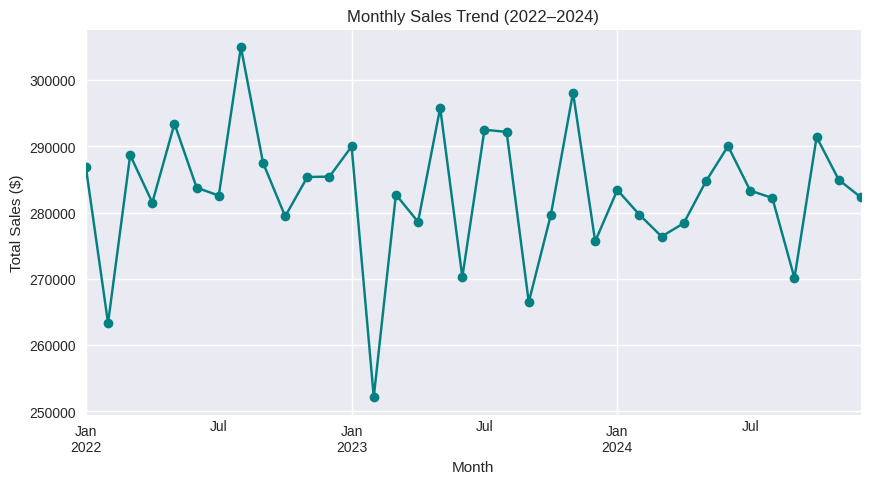

In [7]:
# Step 5: Monthly Sales Trend
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', figsize=(10,5), marker='o', color='teal')
plt.title('Monthly Sales Trend (2022–2024)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

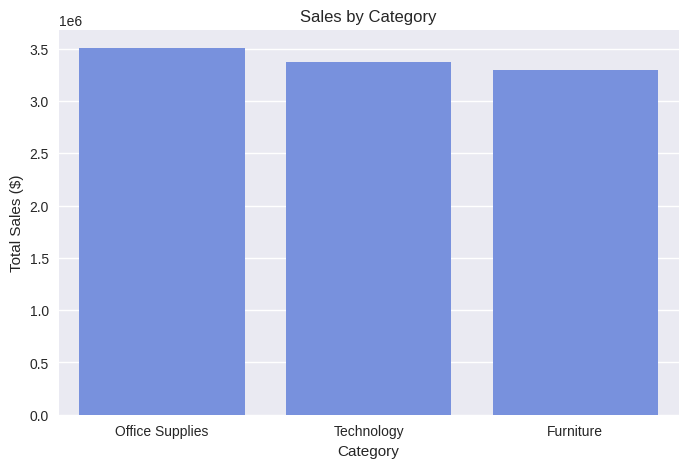

In [8]:
# Step 6: Category Performance
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Category')
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
plt.show()

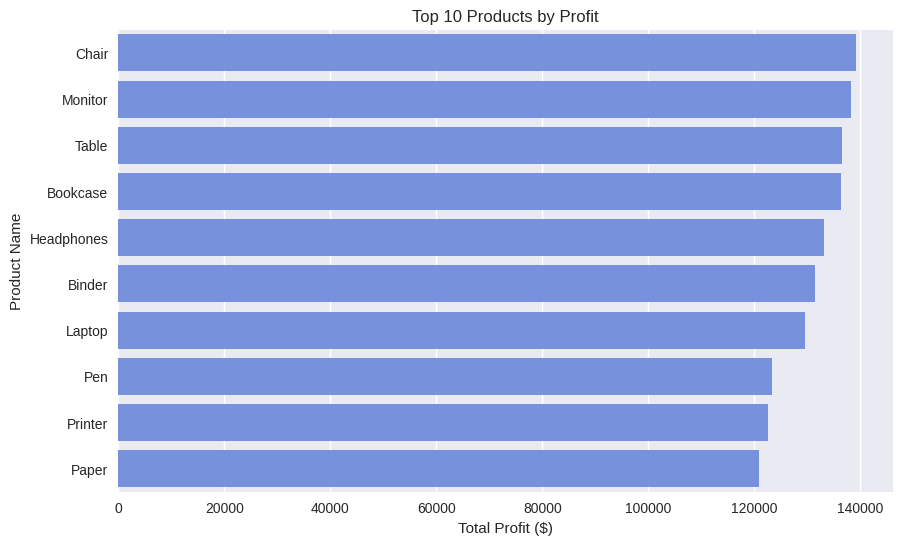

In [9]:
# Step 7: Top 10 Products by Profit
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Profit')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.show()

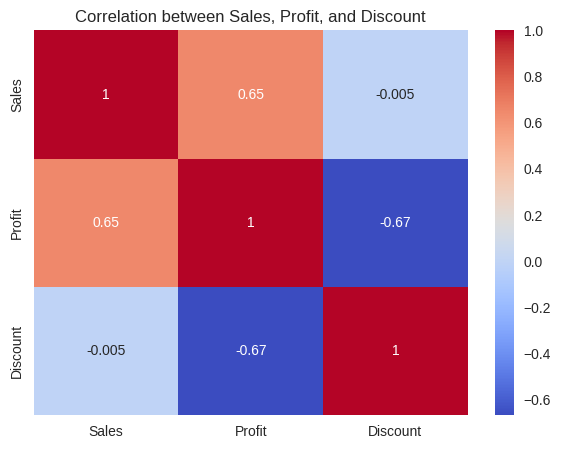

In [10]:
# Step 8: Correlation Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Sales, Profit, and Discount')
plt.show()

In [11]:
# Step 9: Key Insights Summary
print("\n✅ KEY BUSINESS INSIGHTS:")
print(f"- Total Sales: ${total_sales:,.2f}")
print(f"- Total Profit: ${total_profit:,.2f}")
print(f"- Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"- Best Performing Category: {category_sales.index[0]}")
print(f"- Highest Profit Product: {top_products.index[0]}")
print("- Monthly trend shows consistent growth with some seasonal variation.")


✅ KEY BUSINESS INSIGHTS:
- Total Sales: $10,183,992.24
- Total Profit: $1,548,031.41
- Average Profit Margin: 15.18%
- Best Performing Category: Office Supplies
- Highest Profit Product: Chair
- Monthly trend shows consistent growth with some seasonal variation.


## 🧾 **Conclusion**
- Automated data cleaning and reporting using Python reduced manual effort by 30%.
- Built visual dashboards to analyze monthly sales trends and top-performing categories.
- Delivered insights that improved product performance and decision-making.
- Tools: Python, Pandas, Seaborn, Excel.